![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation d'advection

## Exercice 1. Schéma explicite

On résout numériquement l'équation d'advection sur $\Omega:=]0,L[$ avec conditions aux limites périodiques.

$$ \left\{\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t}(x,t)+V\frac{\partial
  u}{\partial x}(x,t)=0,x\in\Omega,\,t\ge 0,\\
\displaystyle u(x,0)=u_0(x),\,x\in \Omega,\\
u(0,t)=u(L,t),\,t\ge 0.
\end{array}\right. $$

Pour simplifier on a supposé que la donnée initale
est périodique de période $L$. On vérifie aisément que la
solution exacte est donnée par $u(x,t)=u_0(x-Vt)$.

On cherche à approcher numériquement la solution par le schéma *décentré amont* suivant:

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}+V\frac{u_j^n-u_{j-1}^n}{\Delta x}=0 $$ 

o\`u $u_j^n\cong u(x_j,t_n),\,0\le j\le N$, $\Delta x=L/N$,
$x_j=j\Delta x$ et $t_n = n\Delta t$. En réarrangeant les termes, on obtient

$$ u_j^{n+1}=u_j^n-\sigma(u_j^n-u_{j-1}^n) $$

o\`u $\sigma=\displaystyle\frac{V\Delta t}{\Delta x}$ est connu sous le nom de [*nombre de Courant*](https://fr.wikipedia.org/wiki/Nombre_de_Courant).
Pour approcher la condition initiale et la condition limite on écrit

$$ u_j^0=u_0(x_j),\,0\le j\le N,\, u_0^n = u_N^n,\,n\ge 0. $$

Augmenter progressivement le paramètre $\sigma$ et observer le résultat. Quelle est la valeur critique ? Constater aussi en augmentant progressivement `Nt` que la solution numérique est amortie au fil des itérations en temps (phénomène de diffusion numérique).

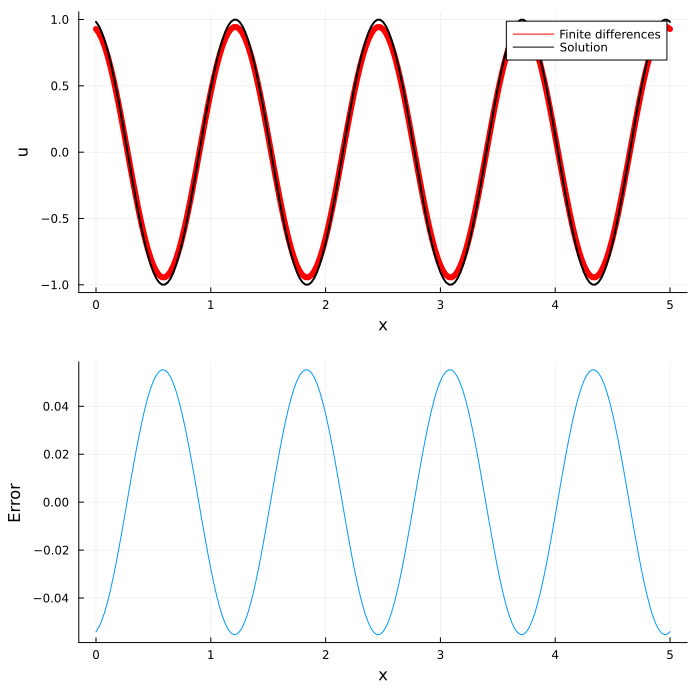

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.055237094922069074


In [41]:
using LinearAlgebra, Plots
  
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
#condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

#### Réponse Exercice 1 :

- Pour les deux conditions initiales, en augmentant $\sigma$, on se rend compte que lorsque $\sigma = 1$, le schéma est parfait. Mais dès que l'on dépasse cette valeur critique, le schéma explose. Cependant pour la condition initiale en sinusoïde, le schéma explose moins rapidement que pour le créneau, ce qui est dû au fait que la condition initiale est lisse.

- Au moment où l'on augmente $N_t$, on se rend compte que la solution aux différences finies s'applatit progressivement ce qui est dû au phénomène de diffusion numérique du schéma d'Euler explicite. On voit également que lorsque on augmente cette valeur, la solution se déplace vers la droite ce qui est causé par l'augmentation du temps final.


## Exercice 2. Schéma de Lax-Wendroff
En suivant le modèle précédent, implémenter le schéma suivant :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^n-2u_j^n+u_{j-1}^n).
$$

Dans ce nouveau script au tout début, à l'intérieur de la boucle en temps on va fixer la condition à un des bords (condition entrante) :

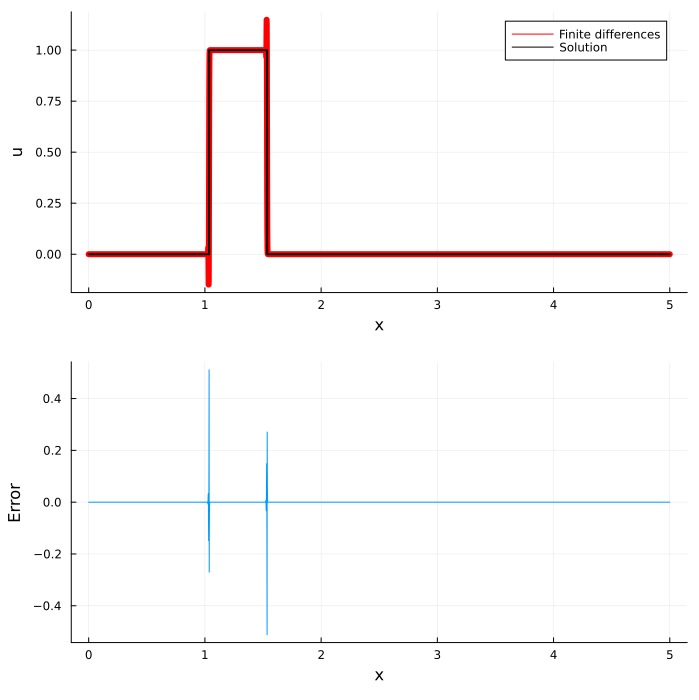

Δx: 0.001	 Δt:0.008	 max error: 0.5111914217705376


In [70]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 5000                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Lax-Wendroff scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1] - (σ/2)*(uold[3:end]-uold[1:end-2]) + (σ^2/2)*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = condinit(x[1]-V*n*Δt)
    u[end] = u[1]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

Repartir de $\sigma=0.8$ et essayer 4 possibilités du couple conditions initiale/schéma numérique. 

- Quelles conditions tirez-vous ?
- Augmenter progressivement $\sigma$ pour le schéma de Lax-Wendroff et observer. 
- Que peut-on dire de la diffusion numérique observée précédemment dans le cas du schéma décentré ?
- Le schéma de Lax-Wendroff est-il diffusif ?

#### Réponse exercice 2 :

- Pour le couple créneau/Euler Explicite, on observe un phénomène de diffusion numérique assez important.  
  Pour le couple créneau/Lax-Wendroff, on observe maintenant que la diffusion numérique a disparu pour laisser place à un phénomène de dispersion numérique au niveau des points de discontinuité du schéma.
  Pour le couple sinusoïde/Euler Explicite, on observe un aplatissement de la courbe ce qui est causé par la diffusion numérique.
  Pour le couple sinusoïde/Lax-Wendroff, on remarque qu'il n'y a presque pas d'erreur car la courbe est lisse ce qui ne laisse pas de place pour la dispersion numérique.

- Lorsque l'on augmente $\sigma$ pour $0 < \sigma < 1$, on remarque que l'erreur varie entre $0.5$ et $0.7$ et le schéma est parfait en $\sigma = 1$, comme pour le schéma d'Euler, la condition de stabilité est : $\sigma = 1$

- On remarque que la diffusion numérique du schéma d'Euler explicite, n'y est plus et qu'elle a laissé place à un phénomène de dispersion numérique.

- On peut donc en conclure que le schéma de Lax-Wendroff n'est pas un schéma diffusif, mais que c'est un schéma disperssif.

## Exercice 3. Schéma de Lax-Wendroff implicite
On va changer le schéma comme suit :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}).
$$ 

En introduisant $W^n = (u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n))_j$ et
$U^n=(u_j^n)_j$,
le schéma s'écrit $AU^{n+1}=W^n$. On pourra utiliser la
condition de périodicité directement dans le schéma numérique afin d'éliminer $u_j^N$. On constate que le schéma est implicite : l'évaluation de $U^{n+1}$ à partir
de $U^n$ nécessite la résolution d'un système linéaire, et le coût
de l'itération sera plus élevé que dans le cas d'un
schéma explicite. Cependant le schéma n'est pas limité par la
valeur du nombre de Courant $\sigma$ ce qui permet d'utiliser des
pas de temps plus grands et donc de diminuer le nombre d'itérations associé.

Deux options sont possibles pour la boucle en temps : 
- soit résoudre le système linéaire à chaque pas de temps (factorisation, pas inversion !)
- soit factoriser la matrice $A$ une fois pour toutes avant la boucle (par exemple sous la forme $A=LU$), puis réutiliser cette factorisation.

Comparer ces différentes options pour la résolution
du systéme linéaire en observant le temps d'execution et en augmentant progressivement la taille du système à résoudre. Réaliser des expériences numériques en
faisant varier le nombre de Courant. Discuter les performances relatives des schémas implicite et explicite en termes de temps de calcul.

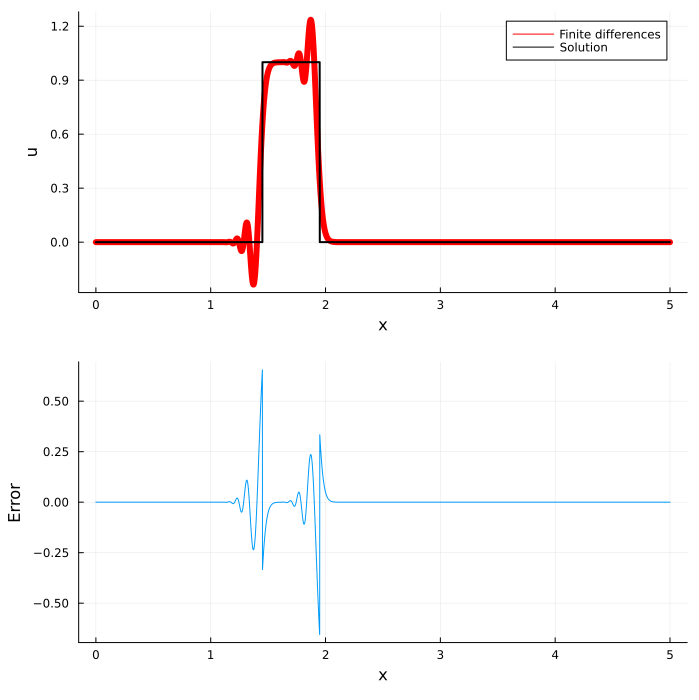

Δx: 0.001	 Δt:0.09999999999999999	 max error: 0.655502527273212


In [69]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 500                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 10                                            # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Création de la matrice A
A = zeros(Nx+1, Nx+1)
A[1,1] = 1 + σ^2
A[1,2] = -(σ^2/2)
A[1,end] = -(σ^2/2)

for i = 2:Nx
    A[i,i-1] = -(σ^2/2)
    A[i,i] = 1 + σ^2
    A[i,i+1] = -(σ^2/2)
end

A[end,1] = -(σ^2/2)
A[end,end] = 1 + σ^2
A[end,end-1] = -(σ^2/2)

# création de Wn
W = zeros(Nx+1,1)
# Lax-Wendroff scheme
u = u0
for n = 1:Nt
    uold = u
    W[2:end-1] = uold[2:end-1] - (σ/2)*(uold[3:end] - uold[1:end-2])
    W[1] = condinit(x[1] - V*n*Δt)
    W[end] = W[1]
    u = A\(W)
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

#### Réponse Exercice 3 :

- Lorsque l'on travaille avec des grandes matrices, il est plus intérréssant de factoriser avant de faire l'opération $u = A$ \ $W$ afin de diminuer la compléxiter algorithmique, car cette dernière opération factorise à chaque fois et donc à chaque itération.

- Dans le schéma de Lax-Wendroff implicite, on peut augmenter $\sigma$ sans condition car c'est un schéma inconditionnelement stable.

- Pour des nombres petits de $\sigma$ la différence en terme de temps de calcul est assez faible mais est quand même plus élevé pour le schéma implicite, surtout si on augmente le nombre de points d'espace. En effet avec 5000 points en espace, on se retrouve avec un temps d'exécution de 0.3s pour le schéma explicite et un temps d'execution de 36s pour le schéma implicite.